In [13]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
le = LabelEncoder()
df["y"] = le.fit_transform(df["y"])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [16]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int32  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [17]:
df_dummies = pd.get_dummies(df)
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [18]:
df_dummies = df_dummies.drop('duration',axis=1)

In [19]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int32  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

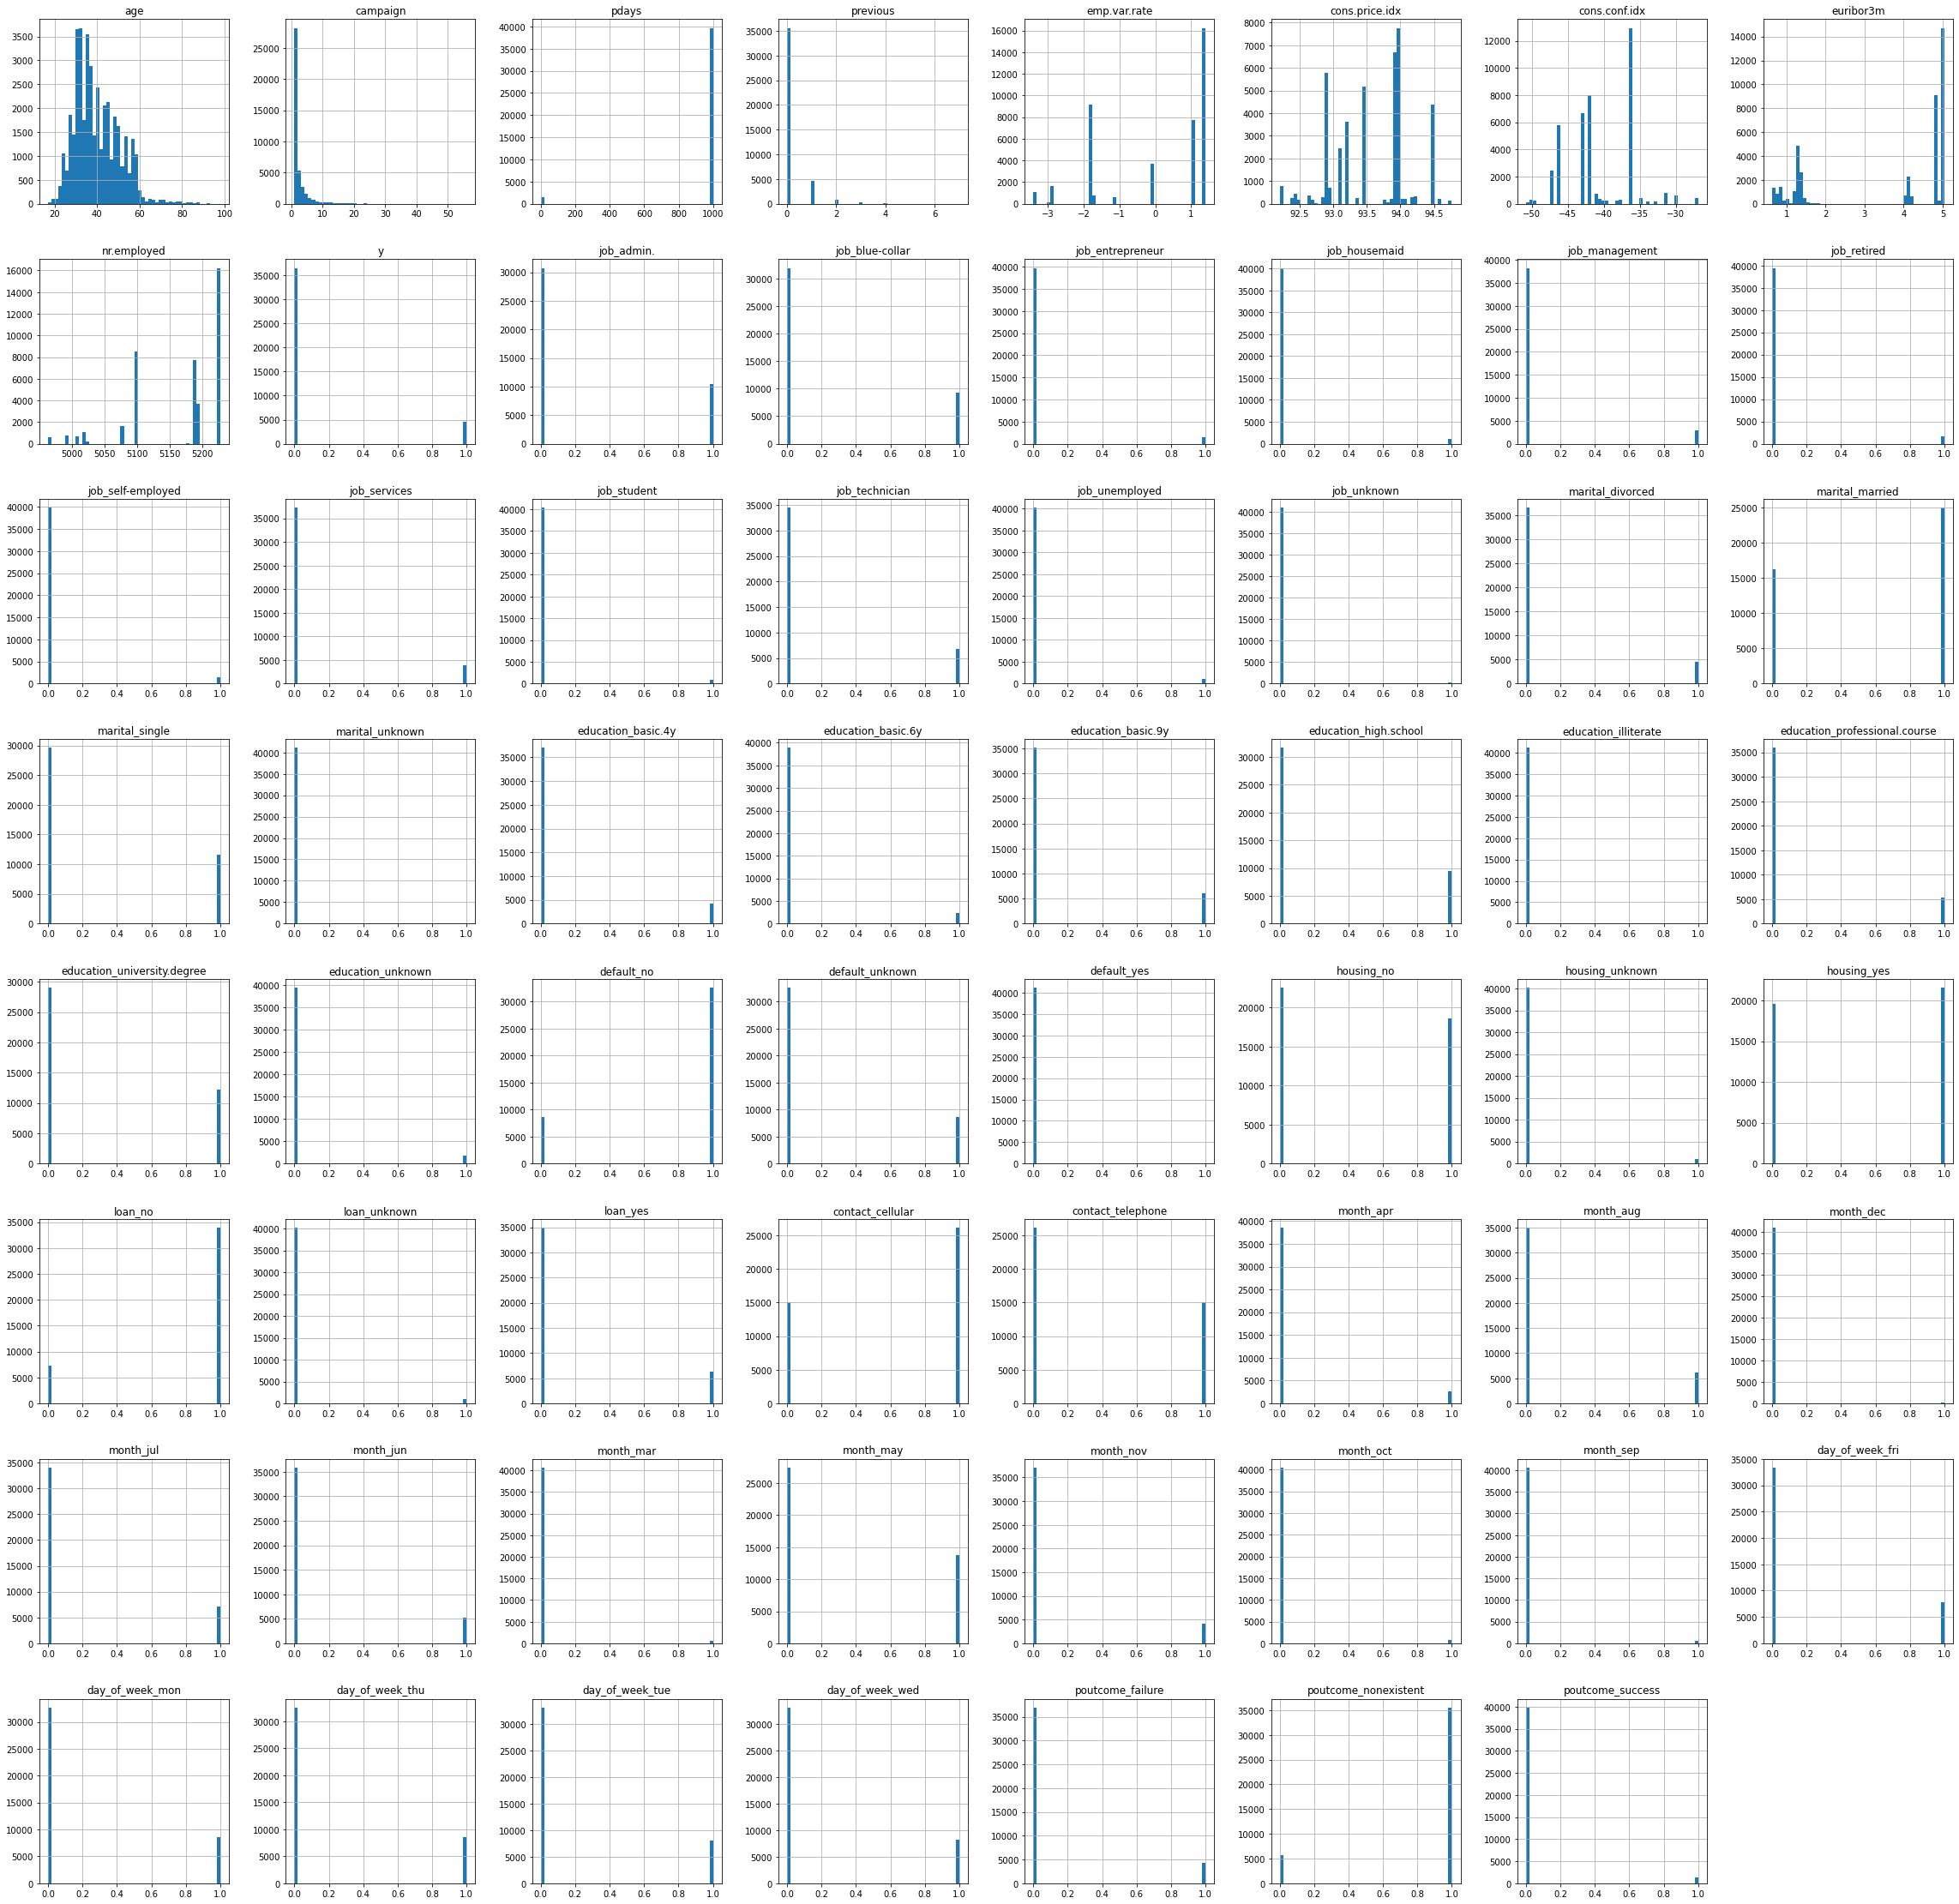

In [20]:
_ = df_dummies.hist(bins=50, figsize=(40,40))

In [9]:
train_set, test_set = train_test_split(df_dummies, test_size=0.2, random_state=50, stratify = df_dummies['y'])  
print(len(train_set), len(test_set))

32950 8238


In [10]:
df_dummies['y'].value_counts(1)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [11]:
train_set['y'].value_counts(1)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [12]:
test_set['y'].value_counts(1)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [13]:
y_train = train_set['y']

In [14]:
y_test = test_set['y']

In [ ]:
X_train = train_set.drop('y', axis = 1)

In [34]:
X_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38445,22,3,6,1,-3.4,92.431,-26.9,0.730,5017.5,0,...,1,0,1,0,0,0,0,0,0,1
17713,36,1,999,0,1.4,93.918,-42.7,4.961,5228.1,1,...,0,0,0,0,0,1,0,0,1,0
30309,37,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,1,...,0,0,0,0,1,0,0,0,1,0
25951,38,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,0,...,0,0,0,0,0,0,1,0,1,0
29064,41,3,999,0,-1.8,93.075,-47.1,1.405,5099.1,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470,37,1,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
18260,43,4,999,0,1.4,93.918,-42.7,4.963,5228.1,1,...,0,0,0,0,0,0,1,0,1,0
141,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
19789,47,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,...,0,0,1,0,0,0,0,0,1,0


In [16]:
X_test = test_set.drop('y', axis = 1)

In [17]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 3)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = "f1")
print("f1 score: %.2f +/- %.2f" % (scores.mean(), scores.std()))

f1 score: 0.24 +/- 0.05


In [19]:
dummy_clf = DummyClassifier()
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring = "f1")
print("f1 score: %.2f +/- %.2f" % (dummy_scores.mean(), dummy_scores.std()))

f1 score: 0.00 +/- 0.00


In [43]:
param_grid = { 
    'n_estimators': [50,100,150],
    'max_depth' : [3,4,5,6,7,8],
}

In [44]:
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(max_depth=3),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150]})

In [45]:
CV_clf.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [32]:
clf0 = RandomForestClassifier(n_estimators =100, max_depth = 8)
clf0.fit(X_train, y_train)
scores = cross_val_score(clf0, X_train, y_train, cv=10, scoring = "f1")
print("f1 score: %.2f +/- %.2f" % (scores.mean(), scores.std()))

f1 score: 0.30 +/- 0.05


In [33]:
# Let's see the feature importances for our classifier
importances = clf0.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

[ 7  8  2 61  6  4  5  0  3 49 60 52 43 50 59 42  1 44 55 48 31 53 33 14
 56 10 34 23 17 57 54 36 22 58 38 30  9 39 18 28 51 41 47 45 16 27 32 25
 21 15 19 26 13 46 37 20 12 11 40 24 29 35]


In [48]:
#7, 8 and 2 are the top 3 improtant features

In [49]:
scores = cross_val_score(clf0, X_test, y_test, cv=10, scoring = "f1")
print("f1 score: %.2f +/- %.2f" % (scores.mean(), scores.std()))

f1 score: 0.35 +/- 0.05


In [50]:
clf_quiz1 = RandomForestClassifier(n_estimators =300, max_depth = 6)
clf_quiz1.fit(X_train, y_train)
scores = cross_val_score(clf_quiz1, X_train, y_train, cv=10, scoring = "f1")
print("f1 score: %.2f +/- %.2f" % (scores.mean(), scores.std()))

f1 score: 0.28 +/- 0.04


In [20]:
clf_quiz2 = RandomForestClassifier(n_estimators =150, max_depth = 6)
clf_quiz2.fit(X_train, y_train)
scores = cross_val_score(clf_quiz2, X_train, y_train, cv=10, scoring = "f1")
print("f1 score: %.2f +/- %.2f" % (scores.mean(), scores.std()))

f1 score: 0.28 +/- 0.05


In [23]:
clf_quiz3 = RandomForestClassifier(random_state = 60, n_estimators =1000, max_depth = 8)
clf_quiz3.fit(X_train, y_train)
f1_score(y_train, clf_quiz3.predict(X_train))

0.3409090909090909

In [25]:
clf_quiz4 = RandomForestClassifier(random_state = 60, n_estimators =100, max_depth = 10)
clf_quiz4.fit(X_train, y_train)

# Let's see the feature importances for our classifier
importances = clf_quiz4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_quiz4.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

[ 7  8  2 61  4  6  5  0  3  1 59 49 60 50 52 43 42 55 44 31 10 48 57 54
 23 38 36 22 58 14 56 33 28  9 30 53 17 39 41 18 27 34 25 21 32 45 16 51
 47 13 26 19 46 37 12 15 40 20 11 24 29 35]


In [39]:
from imblearn.ensemble import BalancedBaggingClassifier
model = BalancedBaggingClassifier()
model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [36]:
f1_score(y_train, model.predict(X_train))

0.9779856906989544

In [37]:
f1_score(y_test, clf_quiz3.predict(X_test))

0.33278955954323